# Week4 - HW 2

1. Acquire power data (https://www.bmreports.com/bmrs/?q=demand/rollingsystemdemanda) for at least 10 days and not more than 40 days. 

1. Create two bar graphs of the power consumption per hour. 
    a. One bar graph has 24 bars; 
    b. one bar graph has 24 times number of days bars. 

1. Your solution should be committed in your Week04 folder.

Graphs must have appropriate labels and there should not be anything extra cluttering. 

In [1]:
import pandas as pd 
import numpy as np

In [2]:
power_data = pd.read_csv('RollingSystemDemand_20210928_2346.csv', names= ['HDR','Date_and_Time','Demand'])
power_data

,HDR,Date_and_Time,Demand
0,HDR,ROLLING SYSTEM DEMAND,NaN
1,VD,20210801000000,20760.0
2,VD,20210801000500,20663.0
3,VD,20210801001000,20575.0
4,VD,20210801001500,20413.0
...,...,...,...
1997,VD,20210807222000,21629.0
1998,VD,20210807222500,21421.0
1999,VD,20210807223000,21236.0
2000,VD,20210807223500,20958.0


In [3]:
power_data.dropna(axis = 0 , inplace= True )
power_data

,HDR,Date_and_Time,Demand
1,VD,20210801000000,20760.0
2,VD,20210801000500,20663.0
3,VD,20210801001000,20575.0
4,VD,20210801001500,20413.0
5,VD,20210801002000,20281.0
...,...,...,...
1996,VD,20210807221500,21739.0
1997,VD,20210807222000,21629.0
1998,VD,20210807222500,21421.0
1999,VD,20210807223000,21236.0


In [12]:
power_data['Date_and_Time'] = pd.to_datetime(power_data['Date_and_Time'])
power_data['date'] =pd.to_datetime(power_data['Date_and_Time'],errors='coerce').dt.date
power_data['Hour'] = pd.to_datetime(power_data['Date_and_Time'],errors='coerce').dt.hour
power_data['Hours'] = pd.to_datetime(power_data['Date_and_Time'],errors='coerce').dt.hour
power_data['Demand'] = power_data['Demand'].astype(int)

In [13]:
power_data_groupby = power_data.groupby('Hour').mean()
power_data_groupby['Hours'] = power_data_groupby['Hours']+1

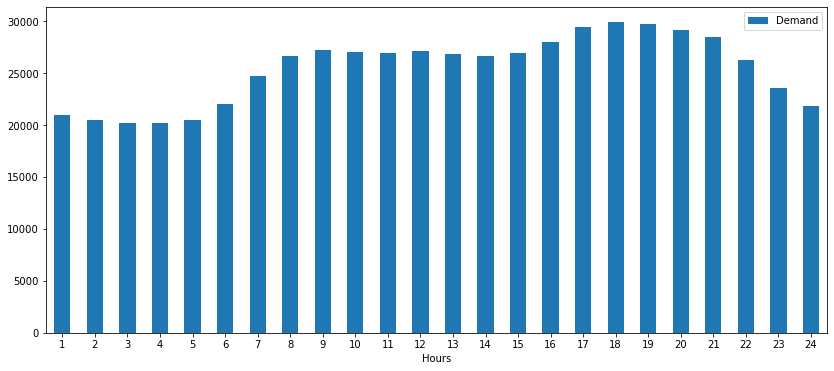

In [14]:
power_data_groupby.plot.bar(x='Hours',y='Demand',rot = 0,figsize=(14,6))

In [17]:
df_new = power_data.groupby(['date','Hour']).mean()
df_new['Hours'] = df_new['Hours']+1
df_new

Demand  hour  Hours
date       Hour                           
2021-08-01 0     20235.250000     0      1
           1     19631.166667     1      2
           2     19597.166667     2      3
           3     19558.416667     3      4
           4     19443.000000     4      5
...                       ...   ...    ...
2021-08-07 18    27058.666667    18     19
           19    26518.500000    19     20
           20    25806.916667    20     21
           21    23831.166667    21     22
           22    21705.000000    22     23

[167 rows x 3 columns]

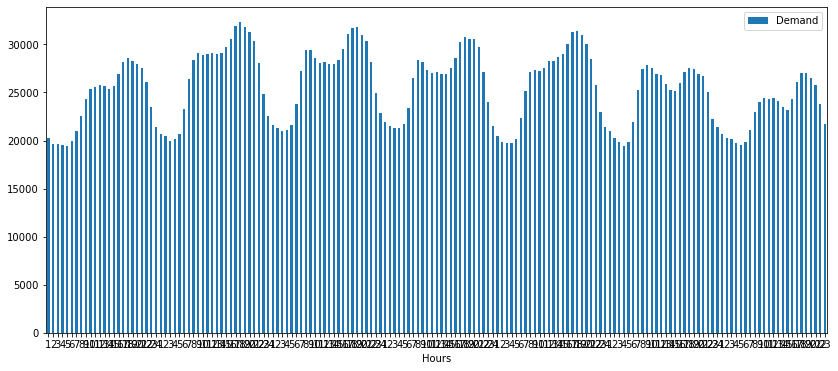

In [18]:
df_new.plot.bar(x='Hours',y='Demand',rot = 0,figsize=(14,6))